In [34]:
#importing libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import random
import numpy as np

In [13]:
#Question 2

def load_data(filepath: str) -> pd.DataFrame:
    # open the file and read lines
    with open('Boston Dataset.csv','r') as f:
            lines = f.readlines()

    flag = 0               #check if we reached to variables name
    flag1 = 0              #check if we reached the last of the variables name
    column_names = []      #store the column names of the df in a list
    rows = []              #record the rows of the df
        
    for line in lines:     #parse the lines

        if 'Variables in order:' in line:
            flag = 1 #start recording column names
            continue


        if flag==0:
            continue #skip all the lines before variable names

        if flag==1 and flag1==0 : #check if we are in the variables names part
            
            #we only need the first word. So splitting and taking the first word. 
            
            line = line.split()
            if len(line)>0:
                column_names.append(line[0])
            
            if 'MEDV' in line:
                flag1 = 1 #reached the last of the variable names

            continue
        
        #if we reached the last variable names then start to record rows
        
        if flag == 1:
            line = line.split() #split the lines to get different values
            # the rows are splitted between 2 successive rows. The lengths are 11 and 3
            # when we get the line with 11 words, we append it to the rows list and if we get 3 words,
            # we add this to the last row
            
            if len(line)==11:
                rows.append(line)
            if len(line)==3:
                rows[-1] += line 

    df = pd.DataFrame(rows, columns = column_names) #create the dataframe with the column names and rows
    
    return df

#call the function and display first 10 rows
df = load_data('Boston Dataset.csv')
df = df.astype('float64')
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


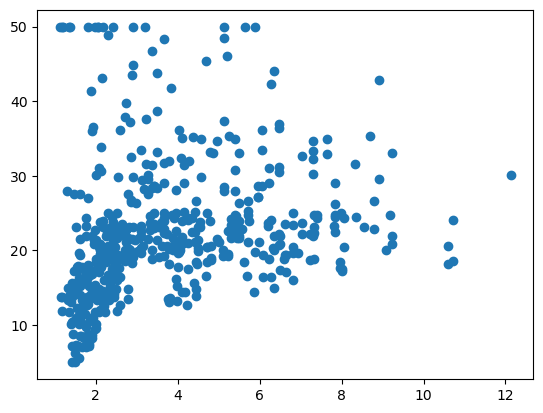

In [16]:
#question 3
#plotting against random columns 
y = df['MEDV'].to_list()
x = df['DIS'].to_list()

plt.scatter(x,y)


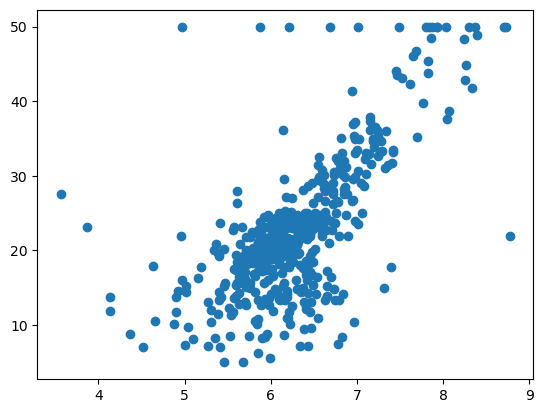

In [14]:
#plotting against random columns 

y = df['MEDV'].to_list()
x = df['RM'].to_list()

plt.scatter(x,y)


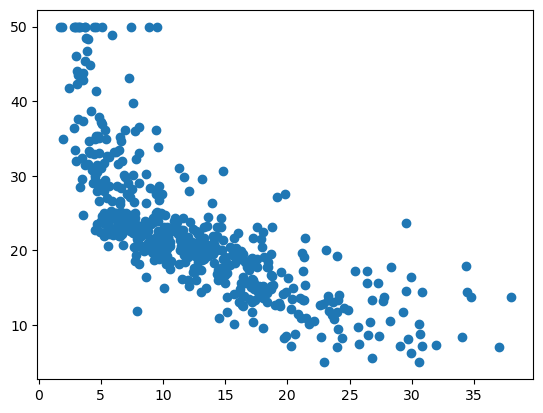

In [26]:
y = df['MEDV'].to_list()
x = df['LSTAT'].to_list()

plt.scatter(x,y)

In [25]:
#calculating correlations with the output to select the single best column
column_names = df.columns.to_list()
y_name = 'MEDV'
correlation_df = df.corr()
correlation_df.loc[correlation_df[y_name].idxmax()]
#LSTAT has the maximum correlation so we use this to predict   

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [31]:
#question 4
def lm(x, y):
    m = random.randint(1,9)
    b = random.randint(1,9)
    # create random m, b
    return m, b

In [47]:
#question 5
y = df['MEDV'].to_list()
x = df['LSTAT'].to_list()
m, b = lm(x, y)
y_pred = []
for xi in x:
    y_pred.append(m*xi + b)

print(m)
print(b)
print(len(y))
print(len(y_pred))

6
2
506
506


In [45]:
#ques 6
def mae(y, y_pred) -> float:
    # calculate the mean absolute error
    error_list = np.array(y) - np.array(y_pred)
    error_list = abs(error_list)
    error = np.mean(error_list)
    return error

mae(y,y_pred)

95.85005928853757

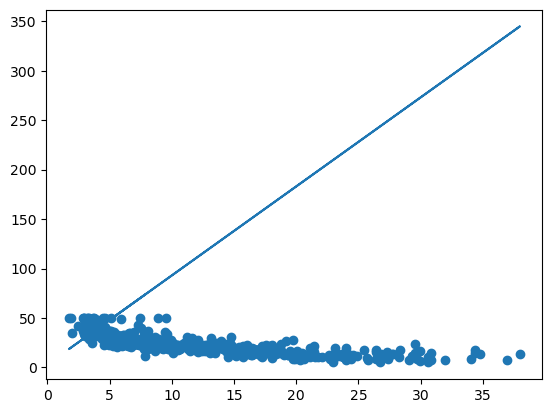

In [46]:

plt.scatter(x,y)
plt.plot(x, y_pred)

In [71]:
def lm(x, y):
    N = len(x)
    m = (N*(np.dot(x,y)) - sum(x)*sum(y))/(N*(np.dot(x,x)) -sum(x)**2)
    b = (sum(y) - m*sum(x))/N
    # create random m, b
    return m, b

-0.9500493537580011
34.55384087938326
506
506


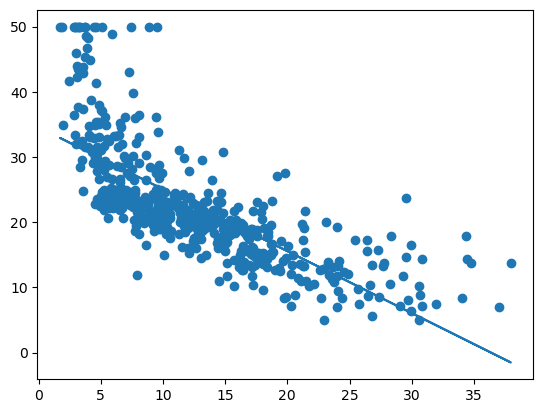

In [74]:
y = df['MEDV'].to_list()
x = df['LSTAT'].to_list()
m, b = lm(x, y)
y_pred = []
for xi in x:
    y_pred.append(m*xi + b)

print(m)
print(b)
print(len(y))
print(len(y_pred))
plt.scatter(x,y)
plt.plot(x, y_pred)

In [75]:
mae(y,y_pred)

4.505281166250579